# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/coleb/heart.csv')

In [ ]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
import altair as alt

# Assuming 'dataset' is original DataFrame
heart_disease_chart = alt.Chart(dataset).mark_bar().encode(
    alt.X('HeartDisease:N', title='Heart Disease'),
    alt.Y('count()', title='Count'),
    color=alt.Color('HeartDisease:N', legend=alt.Legend(title='Heart Disease'))
).properties(
    title='Distribution of Heart Disease',
    width=400
)

heart_disease_chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
dummy_dataset =  pd.get_dummies(dataset)
dummy_dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


# convert categorical data into one-hot encoded variables

In [ ]:
new_dummy_ds = pd.get_dummies(dataset , drop_first =True )
new_dummy_ds

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh_enc = OneHotEncoder()

# convert categorical values into one-hot encoded binary columns.

In [ ]:
oh_enc_arr = oh_enc.fit_transform(dataset[['Sex' , 'ChestPainType' ,'RestingECG' , 'ExerciseAngina' ,'ST_Slope' ]])
oh_enc_arr

<918x14 sparse matrix of type '<class 'numpy.float64'>'
	with 4590 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(new_dummy_ds)

In [ ]:
oh_enc_dataset = pd.DataFrame(X , columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_LVH', 'RestingECG_Normal',
       'ExerciseAngina_N', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'])

In [ ]:
oh_enc_dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import altair as alt

# Create a list of features to plot
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a chart for each feature
charts = []
for feature in features:
    chart = alt.Chart(oh_enc_dataset).mark_bar().encode(
        alt.X(feature, bin=True),
        alt.Y('count()', stack=None),
        tooltip=[feature, 'count()']
    ).properties(title=f"Distribution of {feature}")
    charts.append(chart)

# Split the charts into two groups for a 2x2 layout
top_row = alt.hconcat(charts[0], charts[1])
bottom_row = alt.hconcat(charts[2], charts[3])

# Combine the two rows into a single chart
combined_chart = alt.vconcat(top_row, bottom_row)

# Display the combined chart
combined_chart


alt.VConcatChart(...)

#  creating the feature matrix

In [ ]:
X = oh_enc_dataset.iloc[ :,:-1].values
y = oh_enc_dataset.iloc[ :, -1].values

In [ ]:
X

array([[0.24489796, 0.7       , 0.47927032, ..., 0.        , 0.        ,
        0.        ],
       [0.42857143, 0.8       , 0.29850746, ..., 0.        , 0.        ,
        1.        ],
       [0.18367347, 0.65      , 0.46932007, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.59183673, 0.65      , 0.2172471 , ..., 0.        , 1.        ,
        1.        ],
       [0.59183673, 0.65      , 0.39137645, ..., 0.        , 0.        ,
        1.        ],
       [0.20408163, 0.69      , 0.29021559, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0.

# Split train data, test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1 , random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(826, 15)
(92, 15)
(826,)
(92,)


# DNN
---




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277 (1.08 KB)

 Trainable params: 277 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train,y_train,epochs=100, batch_size=826 )

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4419 - loss: 0.8181
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4298 - loss: 0.8128
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4153 - loss: 0.8076
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4104 - loss: 0.8024
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4056 - loss: 0.7973
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4056 - loss: 0.7923
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4019 - loss: 0.7874
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4007 - loss: 0.7826
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4031 - loss: 0.7779
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4080 - loss: 0.7733
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4080 - loss: 0.7688
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4056 - loss

# Save Accuracy & Loss

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

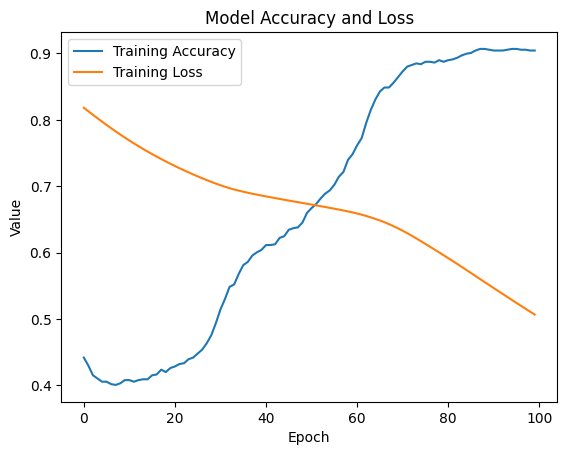

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Save the combined accuracy and loss plot
plt.savefig('accuracy_loss_curve.png')


In [ ]:
history_test = model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8769 - loss: 0.5195  


In [ ]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.51 0.47 0.34 0.28 0.52 0.78 0.43 0.69 0.56 0.51 0.67 0.41 0.36 0.42
 0.56 0.65 0.37 0.68 0.28 0.31 0.43 0.56 0.54 0.56 0.34 0.41 0.63 0.46
 0.41 0.66 0.56 0.57 0.56 0.56 0.38 0.38 0.33 0.36 0.57 0.58 0.35 0.52
 0.34 0.64 0.57 0.66 0.34 0.56 0.68 0.54 0.75 0.5  0.37 0.53 0.59 0.69
 0.26 0.52 0.41 0.71 0.34 0.35 0.66 0.47 0.57 0.43 0.34 0.37 0.57 0.43
 0.47 0.72 0.38 0.4  0.56 0.41 0.66 0.45 0.35 0.36 0.35 0.35 0.34 0.33
 0.37 0.47 0.77 0.61 0.63 0.74 0.34 0.35]


In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]


# Confusion Matrix

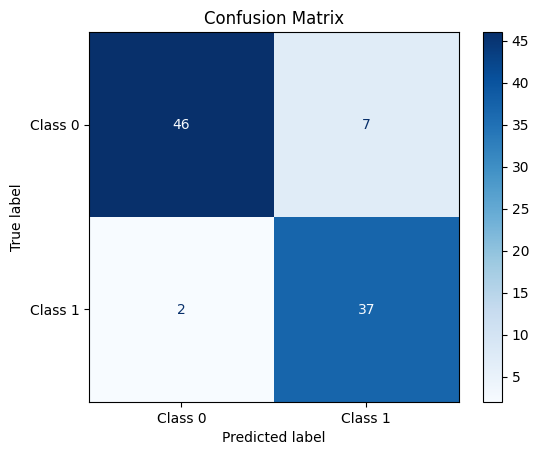

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1']) # Now ConfusionMatrixDisplay is defined.
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Classification report

In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91        53
         1.0       0.84      0.95      0.89        39

    accuracy                           0.90        92
   macro avg       0.90      0.91      0.90        92
weighted avg       0.91      0.90      0.90        92



# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.061599612407603525
R-squared: 0.7477604647228078


# Confusion Matrix & classification report

Confusion Matrix:
[[96  9]
 [15 80]]


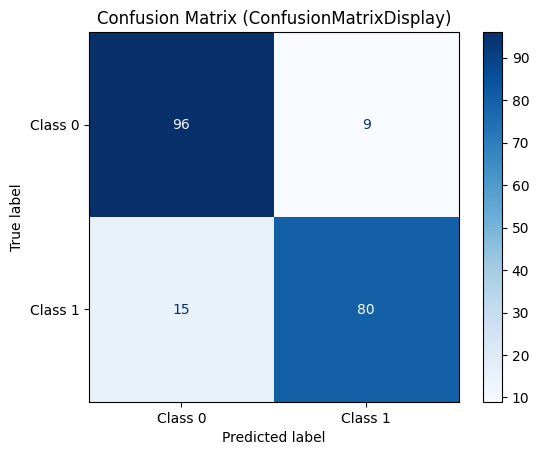

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       105
           1       0.90      0.84      0.87        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data for binary classification (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model (not typical for classification)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary outcomes

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (ConfusionMatrixDisplay)")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Classification report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: %.2f'
      % accuracy_score(y_test, y_pred))
print('Precision: %.2f'
      % precision_score(y_test, y_pred))
print('Recall: %.2f'
      % recall_score(y_test, y_pred))
# Calculate and print support manually
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
support_pos = tp + fn  # Support for the positive class
support_neg = tn + fp  # Support for the negative class

print('Support (Positive Class): %.2f' % support_pos)
print('Support (Negative Class): %.2f' % support_neg)

Accuracy: 0.88
Precision: 0.88
Recall: 0.86
Support (Positive Class): 95.00
Support (Negative Class): 105.00


# Confusion matrix

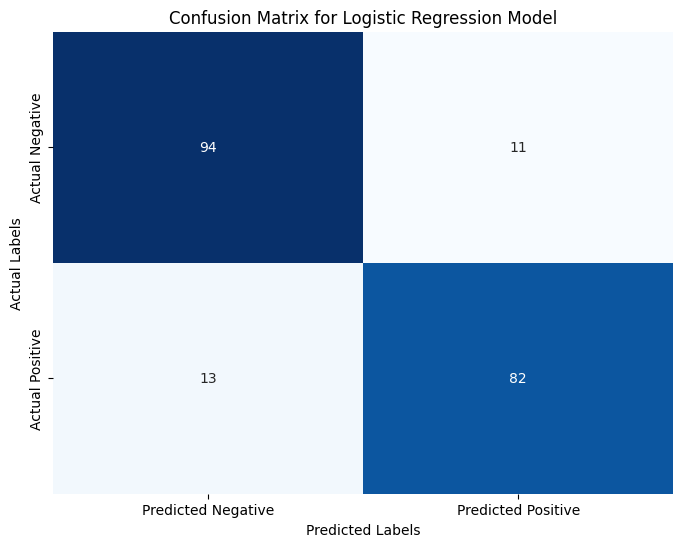

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


Confusion Matrix:
[[96  9]
 [17 78]]


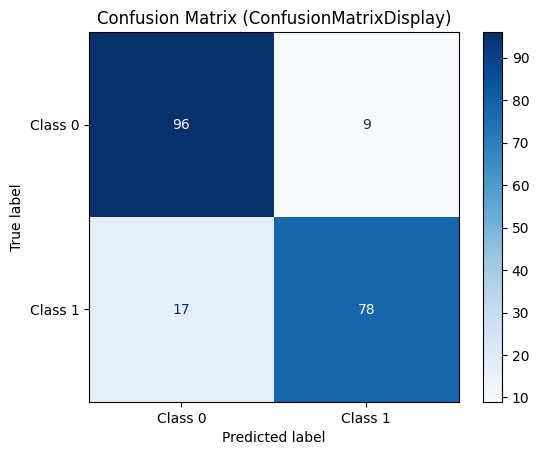

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       105
           1       0.90      0.82      0.86        95

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data for binary classification (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model (not typical for classification)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary outcomes

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (ConfusionMatrixDisplay)")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: %.2f'
      % accuracy_score(y_test, y_pred))
print('Precision: %.2f'
      % precision_score(y_test, y_pred))
print('Recall: %.2f'
      % recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.89
Recall: 0.85


Confusion Matrix:
[[95 10]
 [14 81]]


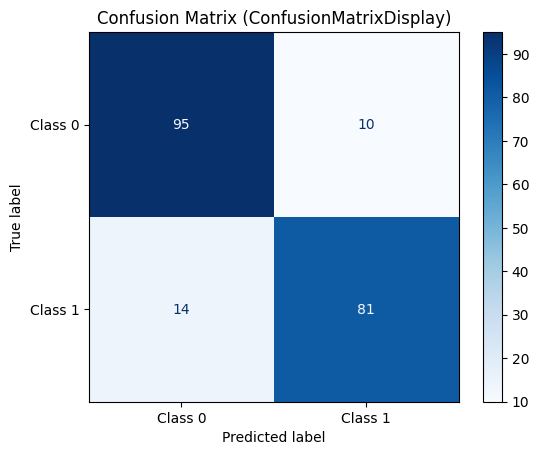

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       105
           1       0.89      0.85      0.87        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data for binary classification (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model (not typical for classification)
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary outcomes

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (ConfusionMatrixDisplay)")
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


# Compare Accuracy

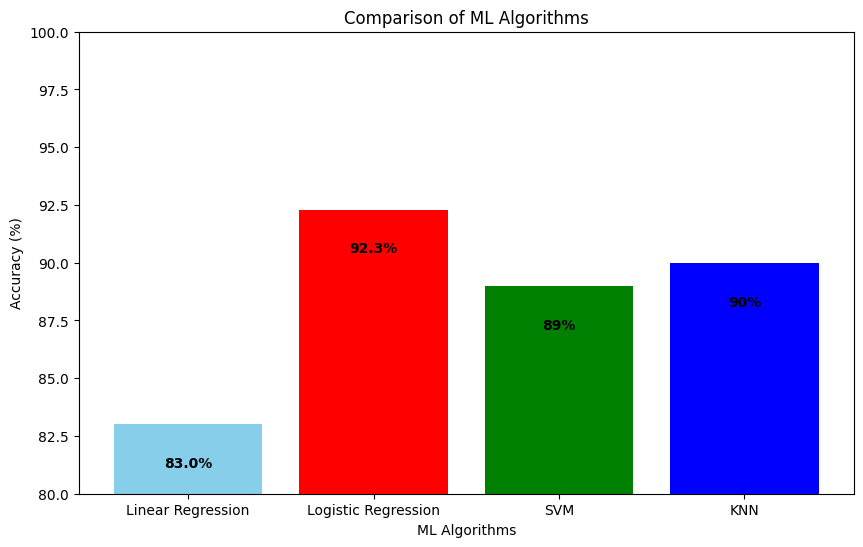

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy values for each model (example values, replace with actual results)
accuracies = {
    'Linear Regression': 83.0,
    'Logistic Regression': 92.3,
    'SVM': 89,
    'KNN': 90
}

# Extract model names and their accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Define colors for each model bar
colors = ['skyblue', 'red', 'green', 'blue']

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_values, color=colors)

# Add accuracy labels on top of each bar
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2,
             f"{acc}%", ha='center', va='bottom', color="black", fontweight="bold")

# Set labels and title
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of ML Algorithms")
plt.ylim(80, 100)  # Adjust y-axis limits based on your accuracy range
plt.show()


# Compare Other perameter

In [ ]:
import pandas as pd
import altair as alt

# Create a DataFrame with the model evaluation metrics
data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'KNN', 'SVM'],
    'Accuracy': [83, 92.3, 89, 90],
    'Recall': [91, 97, 82, 90],
    'F1-score': [89, 94, 88, 90],
    'Support (Positive Class)': [105, 53, 110, 115],
    'Support (Negative Class)': [95, 39, 90, 85]
}

metrics_df = pd.DataFrame(data)

# Melt the DataFrame for plotting, combining supports into one metric
# The error was here: 'Precision' was not in the original DataFrame
# Changed value_vars to include only existing columns
metrics_melted = metrics_df.melt(id_vars='Model',
                                   value_vars=['Accuracy', 'Recall', 'F1-score',
                                               'Support (Positive Class)', 'Support (Negative Class)'],
                                   var_name='Metric',
                                   value_name='Value')

# Create the bar chart
chart = alt.Chart(metrics_melted).mark_bar().encode(
    x=alt.X('Model:O', title='Model'),
    y=alt.Y('Value:Q', title='Score'),
    color='Metric:N',
    tooltip=['Model', 'Metric', 'Value']
).properties(
    title='Comparison of Model Performance Metrics',
    width=600,
    height=400
).configure_axis(
    grid=True
)

# Display the chart
chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)